In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np


# Set up data generators with data augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('basedata/train/',
                                                  target_size=(200, 200),
                                                  batch_size=3,
                                                  class_mode='categorical')

validation_dataset = validation_datagen.flow_from_directory('basedata/validation/',
                                                            target_size=(200, 200),
                                                            batch_size=3,
                                                            class_mode='categorical')

# Build and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Regularization
    tf.keras.layers.Dense(256, activation='relu'),  # Additional Dense layer
    tf.keras.layers.Dense(44, activation='softmax'),  # Updated to match your number of classes
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),  # Adjusted learning rate
              metrics=['accuracy'])

# Set up EarlyStopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',  # or 'loss'
    min_delta=0,  # Minimum change to qualify as an improvement
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    mode='max'  # 'max' for accuracy, 'min' for loss
)

# Train the model with EarlyStopping callback
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=30,
                      validation_data=validation_dataset,
                      validation_steps=1,
                      callbacks=[early_stopping_callback])


Found 2014 images belonging to 44 classes.
Found 464 images belonging to 44 classes.
Epoch 1/30
5/5 [==============================] - 4s 627ms/step - loss: 3.7793 - accuracy: 0.0000e+00 - val_loss: 3.8189 - val_accuracy: 0.0000e+00
Epoch 2/30
5/5 [==============================] - 2s 433ms/step - loss: 3.8617 - accuracy: 0.0000e+00 - val_loss: 3.9291 - val_accuracy: 0.0000e+00
Epoch 3/30
5/5 [==============================] - 3s 558ms/step - loss: 3.7677 - accuracy: 0.0000e+00 - val_loss: 3.6636 - val_accuracy: 0.0000e+00
Epoch 4/30
5/5 [==============================] - 3s 572ms/step - loss: 3.5982 - accuracy: 0.0667 - val_loss: 3.9531 - val_accuracy: 0.0000e+00
Epoch 5/30
5/5 [==============================] - 3s 652ms/step - loss: 3.4821 - accuracy: 0.1333 - val_loss: 3.6400 - val_accuracy: 0.0000e+00
Epoch 6/30
5/5 [==============================] - 3s 545ms/step - loss: 3.9088 - accuracy: 0.0000e+00 - val_loss: 3.4838 - val_accuracy: 0.0000e+00
Epoch 7/30
5/5 [===================

In [5]:
# train_dataset.class_indices


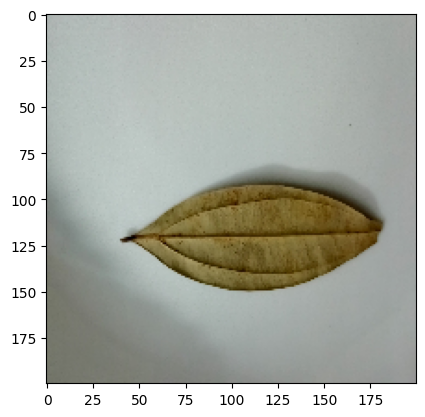

1/1 [==============================] - 0s 205ms/step
This is garlic


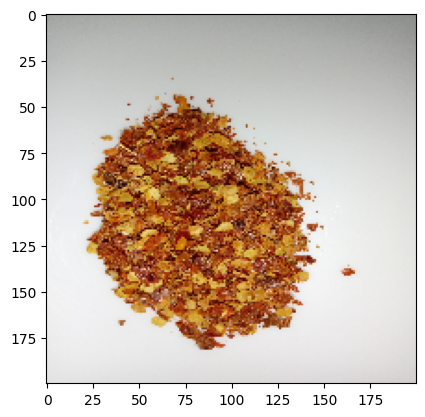

1/1 [==============================] - 0s 43ms/step
This is garlic


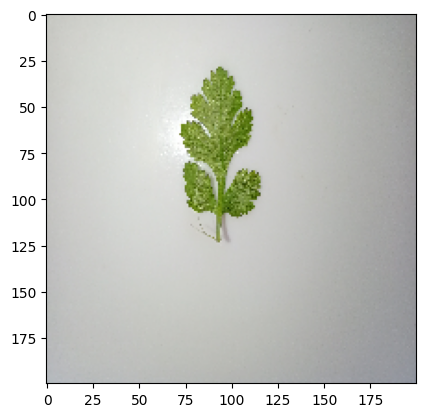

1/1 [==============================] - 0s 40ms/step
This is garlic


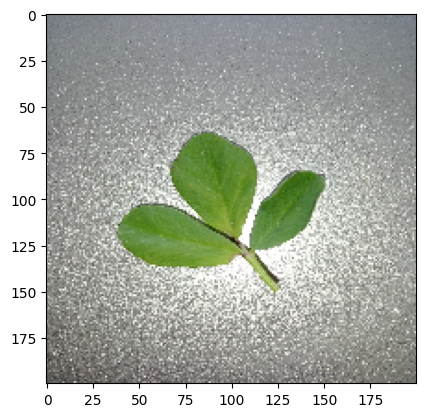

1/1 [==============================] - 0s 42ms/step
This is garlic


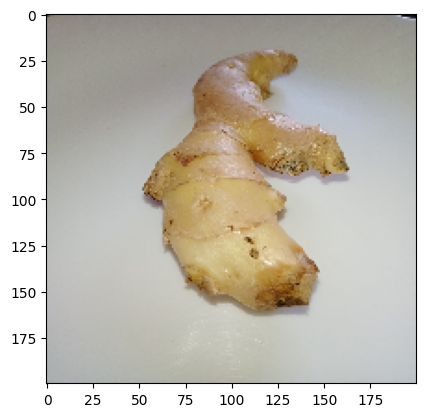

1/1 [==============================] - 0s 75ms/step
This is garlic


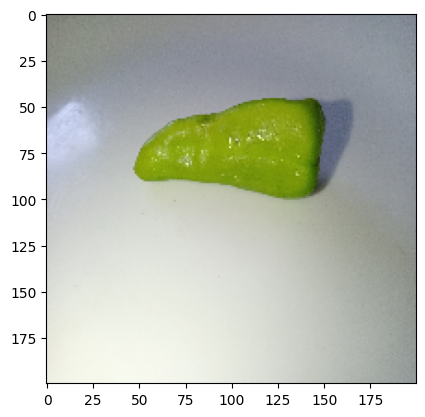

1/1 [==============================] - 0s 38ms/step
This is garlic


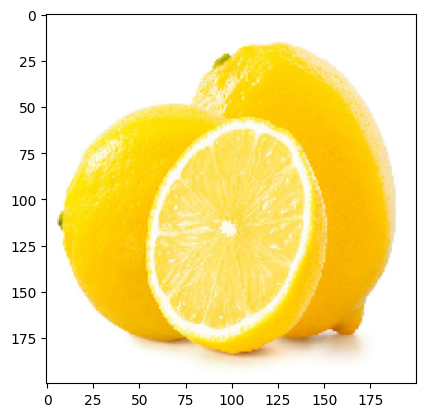

1/1 [==============================] - 0s 37ms/step
This is garlic


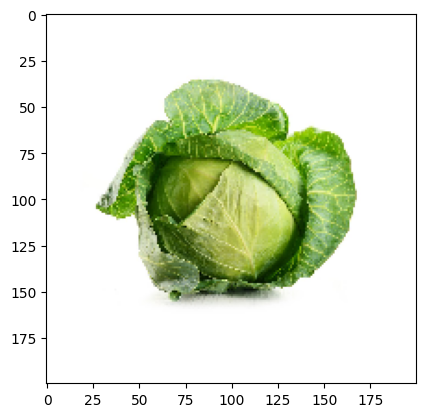

1/1 [==============================] - 0s 37ms/step
This is garlic


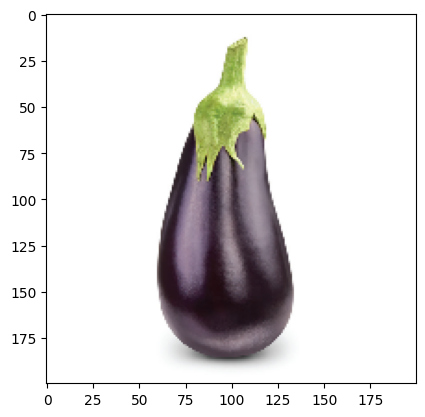

1/1 [==============================] - 0s 37ms/step
This is garlic


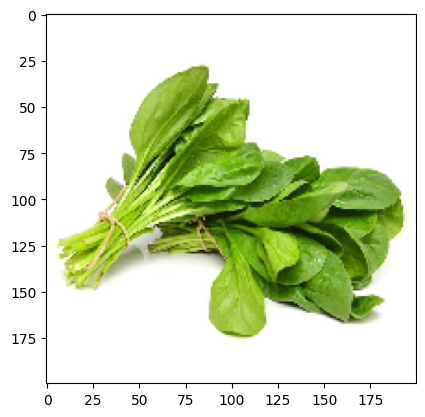

1/1 [==============================] - 0s 36ms/step
This is garlic


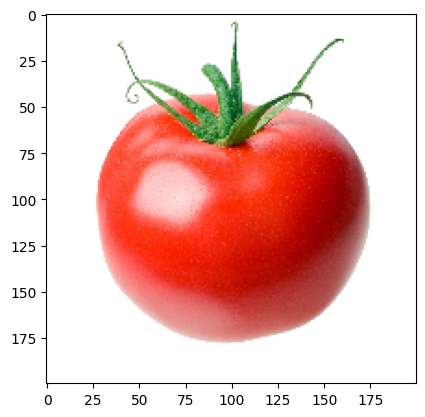

1/1 [==============================] - 0s 40ms/step
This is garlic


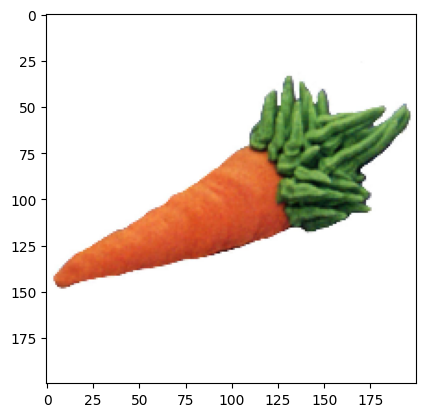

1/1 [==============================] - 0s 42ms/step
This is garlic


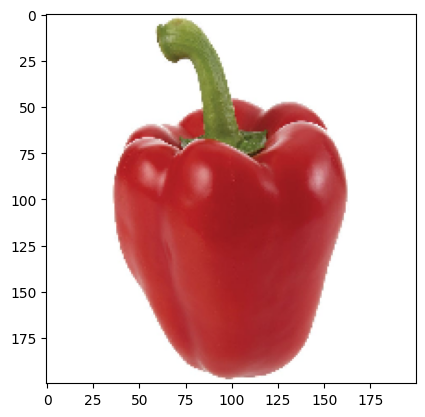

1/1 [==============================] - 0s 43ms/step
This is garlic


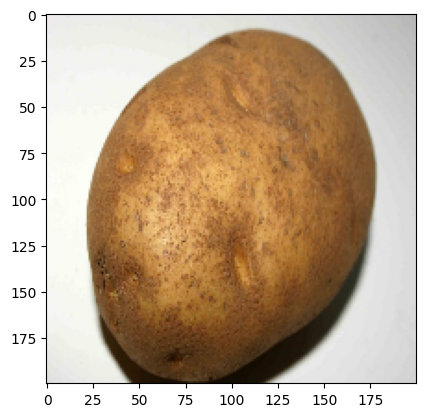

1/1 [==============================] - 0s 39ms/step
This is garlic


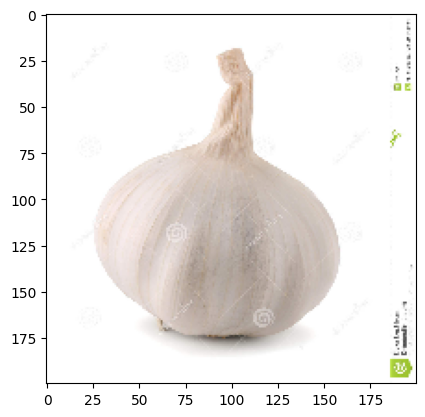

1/1 [==============================] - 0s 43ms/step
This is garlic


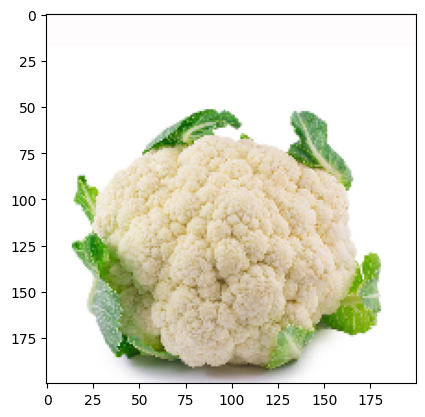

1/1 [==============================] - 0s 45ms/step
This is garlic


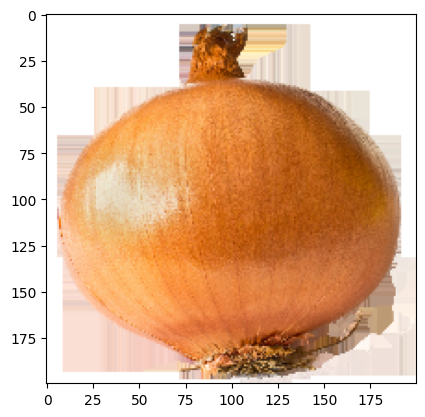

1/1 [==============================] - 0s 39ms/step
This is garlic


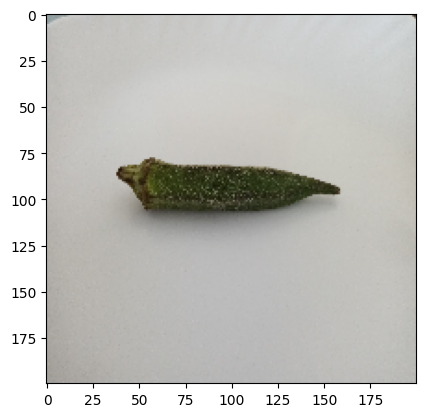

1/1 [==============================] - 0s 40ms/step
This is garlic


In [7]:
dir_path = 'basedata/test'
for i in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, i), target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    prediction = model.predict(images)

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)



    if predicted_class == 0:
        print("This is bayleaf")
    elif predicted_class == 1:
        print("This is blackcumin")
    elif predicted_class == 2:
        print("This is blackpepper")
    elif predicted_class == 3:
        print("This is browncardamom")
    elif predicted_class == 4:
        print("This is cabbage")
    elif predicted_class == 5:
        print("This is canolaoil")
    elif predicted_class == 6:
        print("This is capsicum")
    elif predicted_class == 7:
        print("This is carom")
    elif predicted_class == 8:
        print("This is carrot")
    elif predicted_class == 9:
        print("This is cauliflower")
    elif predicted_class == 10:
        print("This is chanadaal")
    elif predicted_class == 11:
        print("This is chilli pepper")
    elif predicted_class == 12:
        print("This is chilliflakes")
    elif predicted_class == 13:
        print("This is cinnamon")
    elif predicted_class == 14:
        print("This is clove")
    elif predicted_class == 15:
        print("This is coconutpowder")
    elif predicted_class == 16:
        print("This is coriander")
    elif predicted_class == 17:
        print("This is corianderpowder")
    elif predicted_class == 18:
        print("This is cumin")
    elif predicted_class == 19:
        print("This is driedplums")
    elif predicted_class == 20:
        print("This is eggplant")
    elif predicted_class == 21:
        print("This is fennel")
    elif predicted_class == 22:
        print("This is fenugreekleaves")
    elif predicted_class == 23:
        print("This is garammasalaspicepowder")
    elif predicted_class == 24:
        print("This is garlic")
    elif predicted_class == 25:
        print("This is ginger")
    elif predicted_class == 26:
        print("This is greencardamom")
    elif predicted_class == 27:
        print("This is ladyfinger")
    elif predicted_class == 28:
        print("This is lemon")
    elif predicted_class == 29:
        print("This is lentilmash")
    elif predicted_class == 30:
        print("This is onion")
    elif predicted_class == 31:
        print("This is pomegranateseeds")
    elif predicted_class == 32:
        print("This is potato")
    elif predicted_class == 33:
        print("This is redlentilmasoor")
    elif predicted_class == 34:
        print("This is rice")
    elif predicted_class == 35:
        print("This is salt")
    elif predicted_class == 36:
        print("This is spinach")
    elif predicted_class == 37:
        print("This is staraniseed")
    elif predicted_class == 38:
        print("This is sugar")
    elif predicted_class == 39:
        print("This is taroroot")
    elif predicted_class == 40:
        print("This is tomato")
    elif predicted_class == 41:
        print("This is turmeric")
    elif predicted_class == 42:
        print("This is yellowlentilmoong")
    else:
        print("This is yogurt")
